In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/cleaned_chess_games.csv")

In [3]:
df.head(10)

,url,time_control,rated,brengall99_rating,opponent_rating,white_username,white_rating,black_username,black_rating,result,result_games,start_date,end_date,start_time,end_time,fen,eco,eco_url,event,termination
0,https://www.chess.com/game/live/2481103912,600,True,1051,1249,brengall99,1051,Pelleaon,1249,checkmated - win,0-1,2017.12.10,2017.12.10,21:25:42,21:30:46,3r1rk1/1pp1pp1p/p5p1/6P1/8/1P3Pb1/P5P1/5q1K w - -,B00,https://www.chess.com/openings/Nimzowitsch-Def...,Live Chess,Pelleaon won by checkmate
1,https://www.chess.com/game/daily/181561296,1/86400,True,1000,800,brengall99,1000,XxXG3rRyAdaMZXXx,800,win - resigned,1-0,2017.12.10,2017.12.10,21:35:21,21:37:02,rnbqkbnr/ppp1pppp/3p4/8/4P3/8/PPPP1PPP/RNBQKBN...,B07,https://www.chess.com/openings/Pirc-Defense,Let's Play!,brengall99 won by resignation
2,https://www.chess.com/game/live/2481126262,600,True,932,1188,Mvbuilder118,1188,brengall99,932,win - checkmated,1-0,2017.12.10,2017.12.10,21:38:53,21:42:57,8/p1p5/3p4/kQ4B1/6b1/1Q1P1BP1/PPP2K1P/RN4NR b - -,C20,https://www.chess.com/openings/Kings-Pawn-Open...,Live Chess,Mvbuilder118 won by checkmate
3,https://www.chess.com/game/live/2481138605,600,True,828,958,Faustino0829,958,brengall99,828,win - resigned,1-0,2017.12.10,2017.12.10,21:46:08,21:53:12,6r1/5p2/3p1k2/8/8/3P1Q2/P4P1P/1R2R2K b - -,A00,https://www.chess.com/openings/Mieses-Opening-...,Live Chess,Faustino0829 won by resignation
4,https://www.chess.com/game/daily/181561476,1/86400,True,1071,645,XxXG3rRyAdaMZXXx,645,brengall99,1071,checkmated - win,0-1,2017.12.10,2017.12.10,21:38:29,22:42:42,2k3nr/ppp2ppp/2n5/8/P1Pp1P2/b3r2b/1q6/1K6 w - ...,A40,https://www.chess.com/openings/Englund-Gambit,Let's Play!,brengall99 won by checkmate
5,https://www.chess.com/game/daily/181562534,1/86400,True,1163,866,brengall99,1163,Rossmh16,866,win - checkmated,1-0,2017.12.10,2017.12.10,21:55:04,22:45:47,r3k1r1/pb1pQ2p/5p1b/8/8/1P2R3/P4NPP/R6K b q - ...,B00,https://www.chess.com/openings/Owens-Defense,Let's Play!,brengall99 won by checkmate
6,https://www.chess.com/game/daily/181565356,1/86400,True,1224,908,eoghanthedestroyer,908,brengall99,1224,resigned - win,0-1,2017.12.10,2017.12.10,22:42:53,23:07:06,r1b1k2r/ppqp1ppp/4P3/6P1/Pn5P/8/3KP3/8 w kq - ...,A00,https://www.chess.com/openings/Ware-Opening-1....,Let's Play!,brengall99 won by resignation
7,https://www.chess.com/game/daily/181566622,1/86400,True,1258,870,brengall99,1258,eoghanthedestroyer,870,win - checkmated,1-0,2017.12.10,2017.12.11,23:08:16,00:10:57,3k2Q1/BQ6/8/8/8/PP6/2PP4/6K1 b - - 10 52,B07,https://www.chess.com/openings/Pirc-Defense-2.Bc4,Let's Play!,brengall99 won by checkmate
8,https://www.chess.com/game/daily/181612316,1/172800,True,1281,845,brengall99,1281,eoghanthedestroyer,845,win - checkmated,1-0,2017.12.11,2017.12.11,14:45:06,15:26:29,r1k3Q1/3p4/p2B3p/2N1n1p1/3PKp2/8/5P1P/1R6 b - ...,B00,https://www.chess.com/openings/Kings-Pawn-Opening,Let's Play!,brengall99 won by checkmate
9,https://www.chess.com/game/daily/181627996,1/172800,True,1298,827,brengall99,1298,eoghanthedestroyer,827,win - checkmated,1-0,2017.12.11,2017.12.11,18:31:00,20:07:52,r6r/bR6/pkp2n1p/1pN5/1P3pP1/2P4b/P1K5/3R4 b - ...,C21,https://www.chess.com/openings/Center-Game,Let's Play!,brengall99 won by checkmate


In [4]:
print(sorted(df['time_control'].unique()))

['1/172800', '1/259200', '1/604800', '1/86400', '1200', '180', '1800', '300', '300+5', '60', '600']


In [5]:
time_controls = {
    '1/172800': '48-hour game',
    '1/259200': '72-hour game',
    '1/604800': '1-week game',
    '1/86400': '1-day game',
    '1200': '20-minute game',
    '180': '3-minute game',
    '1800': '30-minute game',
    '300': '5-minute game',
    '300+5': '5-minute game with 5-second increment per move',
    '60': '1-minute game',
    '600': '10-minute game'
}

In [6]:
print(df['time_control'].value_counts())

time_control
180         3284
300         1370
1/86400      197
600           58
60            34
1/259200      11
1/604800       4
1/172800       3
300+5          1
1800           1
1200           1
Name: count, dtype: int64


In [7]:
print(df['eco'].value_counts())

eco
C50    435
A80    289
C41    250
B01    247
C45    224
      ... 
A05      1
B43      1
C70      1
B90      1
A87      1
Name: count, Length: 115, dtype: int64


In [8]:
df.columns

Index(['url', 'time_control', 'rated', 'brengall99_rating', 'opponent_rating',
       'white_username', 'white_rating', 'black_username', 'black_rating',
       'result', 'result_games', 'start_date', 'end_date', 'start_time',
       'end_time', 'fen', 'eco', 'eco_url', 'event', 'termination'],
      dtype='object')

In [9]:
df.dtypes

url                  object
time_control         object
rated                  bool
brengall99_rating     int64
opponent_rating       int64
white_username       object
white_rating          int64
black_username       object
black_rating          int64
result               object
result_games         object
start_date           object
end_date             object
start_time           object
end_time             object
fen                  object
eco                  object
eco_url              object
event                object
termination          object
dtype: object

In [10]:
df.describe()

,brengall99_rating,opponent_rating,white_rating,black_rating
count,4964.000000,4964.000000,4964.000000,4964.000000
mean,1196.639001,1182.528807,1189.963537,1189.204271
std,161.503632,185.600973,175.229528,172.988547
min,577.000000,290.000000,290.000000,290.000000
25%,1130.750000,1111.000000,1121.000000,1119.000000
50%,1224.000000,1217.000000,1221.000000,1220.000000
75%,1308.000000,1306.000000,1307.000000,1307.000000
max,1499.000000,1762.000000,1762.000000,1732.000000


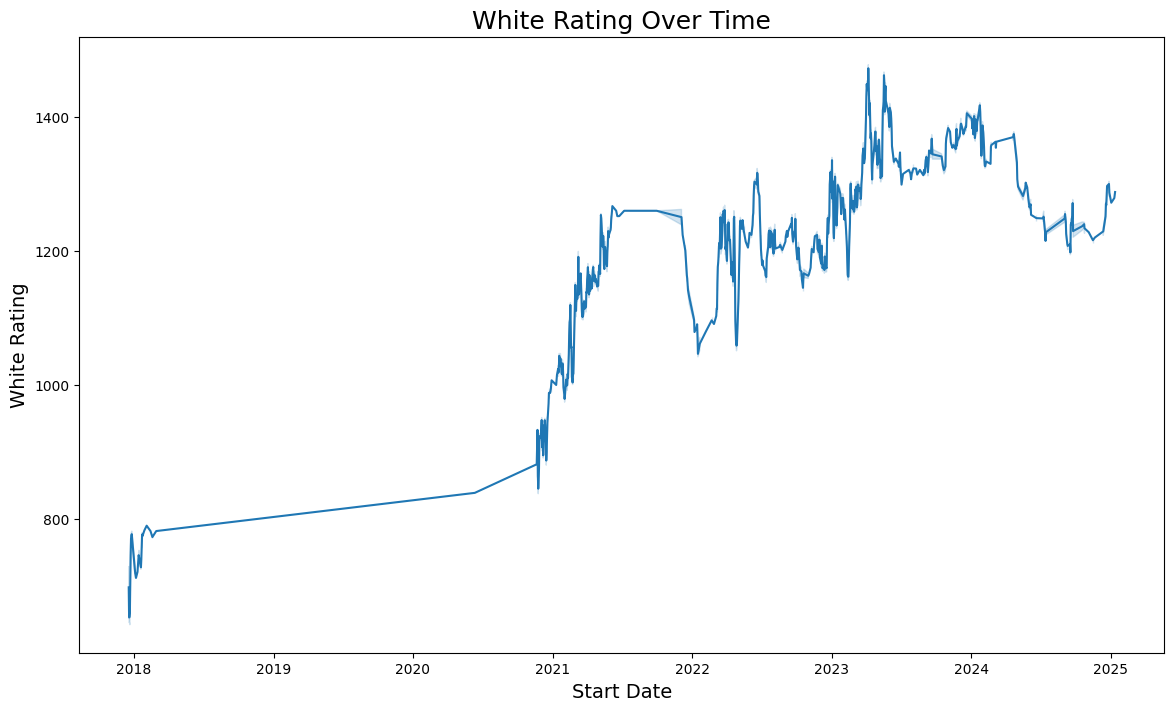

In [11]:
df['start_date'] = pd.to_datetime(df['start_date'])
blitz_df = df[
    (df['time_control'] == '180') | 
    (df['time_control'] == '300')
]

# Set figure size
plt.figure(figsize=(14, 8))

# Create the line plot
sns.lineplot(x='start_date', y='brengall99_rating', data=blitz_df)

# Add title and labels
plt.title("White Rating Over Time", fontsize=18)
plt.xlabel("Start Date", fontsize=14)
plt.ylabel("White Rating", fontsize=14)

# Show the plot
plt.show()


In [12]:
result_counts = df['result'].value_counts()

In [13]:
print(result_counts)

result
win - resigned                             1345
resigned - win                             1283
checkmated - win                            715
win - checkmated                            712
timeout - win                               315
win - timeout                               308
repetition - repetition                      74
timevsinsufficient - timevsinsufficient      44
abandoned - win                              37
insufficient - insufficient                  36
win - abandoned                              35
stalemate - stalemate                        35
agreed - agreed                              24
50move - 50move                               1
Name: count, dtype: int64


In [14]:
result_termination_counts = df['termination'].value_counts()

In [15]:
print(result_termination_counts)

termination
brengall99 won by resignation      1072
brengall99 won by checkmate         786
brengall99 won on time              545
Game drawn by repetition             74
brengall99 won - game abandoned      62
                                   ... 
blackurist won by checkmate           1
tkg100 won by resignation             1
Akimb won by resignation              1
rajesh712 won by checkmate            1
mmassaji won by resignation           1
Name: count, Length: 2239, dtype: int64


In [16]:
result_termination_counts.head(12)

termination
brengall99 won by resignation                     1072
brengall99 won by checkmate                        786
brengall99 won on time                             545
Game drawn by repetition                            74
brengall99 won - game abandoned                     62
Game drawn by timeout vs insufficient material      44
Game drawn by insufficient material                 36
Game drawn by stalemate                             35
Game drawn by agreement                             24
eoghanthedestroyer won by checkmate                  6
ValdemarK won by resignation                         4
Gloriouspharao44 won by resignation                  4
Name: count, dtype: int64

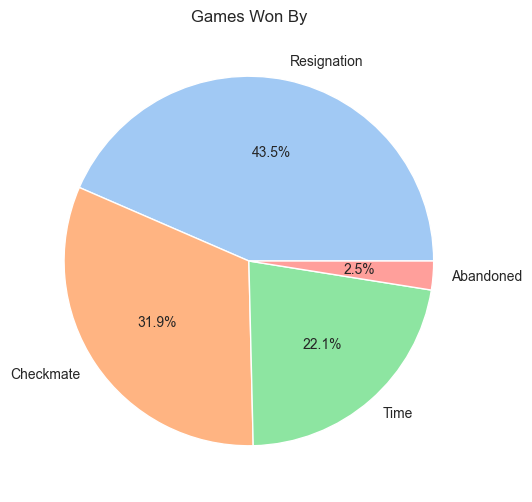

In [17]:
data = {
    'labels': ['Resignation', 'Checkmate', 'Time', 'Abandoned'],
    'values': [1072, 786, 545, 62]}

df_won_by = pd.DataFrame(data)

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_won_by['values'], labels=df_won_by['labels'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Games Won By')
plt.show()

In [18]:
df.head()

,url,time_control,rated,brengall99_rating,opponent_rating,white_username,white_rating,black_username,black_rating,result,result_games,start_date,end_date,start_time,end_time,fen,eco,eco_url,event,termination
0,https://www.chess.com/game/live/2481103912,600,True,1051,1249,brengall99,1051,Pelleaon,1249,checkmated - win,0-1,2017-12-10,2017.12.10,21:25:42,21:30:46,3r1rk1/1pp1pp1p/p5p1/6P1/8/1P3Pb1/P5P1/5q1K w - -,B00,https://www.chess.com/openings/Nimzowitsch-Def...,Live Chess,Pelleaon won by checkmate
1,https://www.chess.com/game/daily/181561296,1/86400,True,1000,800,brengall99,1000,XxXG3rRyAdaMZXXx,800,win - resigned,1-0,2017-12-10,2017.12.10,21:35:21,21:37:02,rnbqkbnr/ppp1pppp/3p4/8/4P3/8/PPPP1PPP/RNBQKBN...,B07,https://www.chess.com/openings/Pirc-Defense,Let's Play!,brengall99 won by resignation
2,https://www.chess.com/game/live/2481126262,600,True,932,1188,Mvbuilder118,1188,brengall99,932,win - checkmated,1-0,2017-12-10,2017.12.10,21:38:53,21:42:57,8/p1p5/3p4/kQ4B1/6b1/1Q1P1BP1/PPP2K1P/RN4NR b - -,C20,https://www.chess.com/openings/Kings-Pawn-Open...,Live Chess,Mvbuilder118 won by checkmate
3,https://www.chess.com/game/live/2481138605,600,True,828,958,Faustino0829,958,brengall99,828,win - resigned,1-0,2017-12-10,2017.12.10,21:46:08,21:53:12,6r1/5p2/3p1k2/8/8/3P1Q2/P4P1P/1R2R2K b - -,A00,https://www.chess.com/openings/Mieses-Opening-...,Live Chess,Faustino0829 won by resignation
4,https://www.chess.com/game/daily/181561476,1/86400,True,1071,645,XxXG3rRyAdaMZXXx,645,brengall99,1071,checkmated - win,0-1,2017-12-10,2017.12.10,21:38:29,22:42:42,2k3nr/ppp2ppp/2n5/8/P1Pp1P2/b3r2b/1q6/1K6 w - ...,A40,https://www.chess.com/openings/Englund-Gambit,Let's Play!,brengall99 won by checkmate


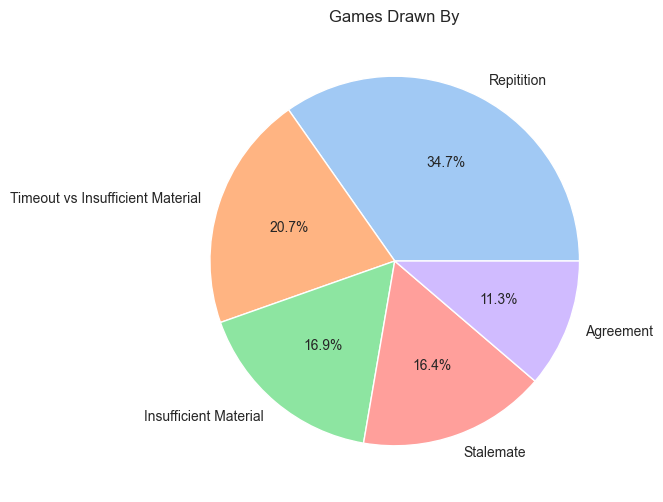

In [19]:
data = {
    'labels': ['Repitition', 'Timeout vs Insufficient Material', 'Insufficient Material', 'Stalemate', 'Agreement'],
    'values': [74, 44, 36, 35, 24]}

df_drawn_by = pd.DataFrame(data)

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_drawn_by['values'], labels=df_drawn_by['labels'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Games Drawn By')
plt.show()

In [20]:
df['last_word'] = df['termination'].str.split().str[-1]

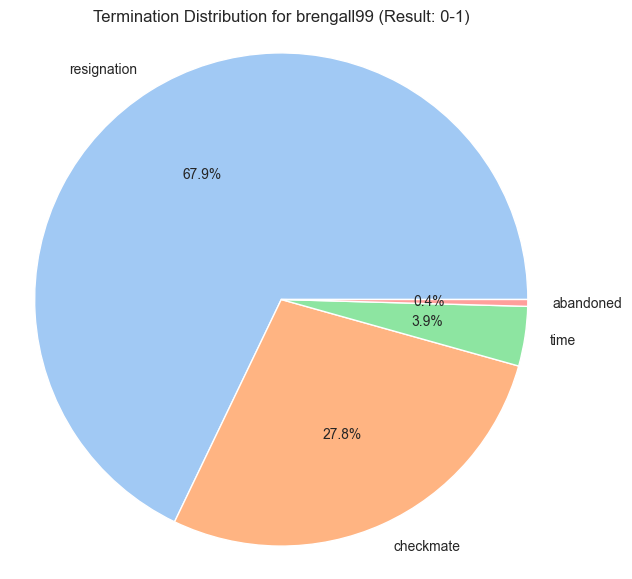

In [21]:
df.head()
filtered_df = df[(df['white_username'] == 'brengall99') & (df['result_games'] == '0-1')]

# Count occurrences of each termination in the filtered DataFrame
termination_count = filtered_df['last_word'].value_counts()

# Create pie chart
plt.figure(figsize=(7, 7))
plt.tight_layout()
plt.pie(termination_count, labels=termination_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Termination Distribution for brengall99 (Result: 0-1)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

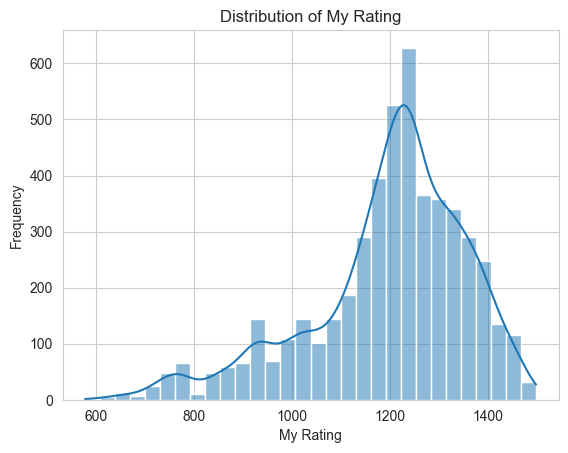

In [22]:
data = df['brengall99_rating']

# Histogram with KDE
sns.histplot(data, kde=True, bins=30)
plt.title('Distribution of My Rating')
plt.xlabel('My Rating')
plt.ylabel('Frequency')
plt.show()

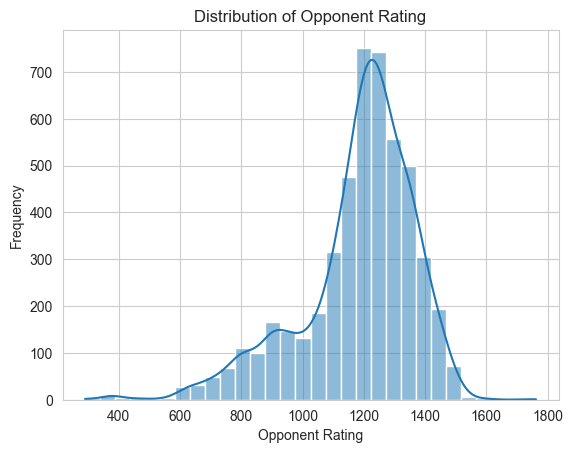

In [23]:
data = df['opponent_rating']

# Histogram with KDE
sns.histplot(data, kde=True, bins=30)
plt.title('Distribution of Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Frequency')
plt.show()

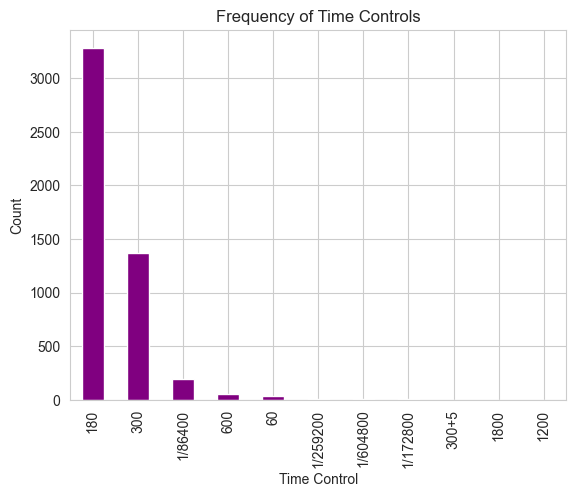

In [24]:
df['time_control'].value_counts().plot(kind='bar', color='purple')
plt.title('Frequency of Time Controls')
plt.xlabel('Time Control')
plt.ylabel('Count')
plt.show()

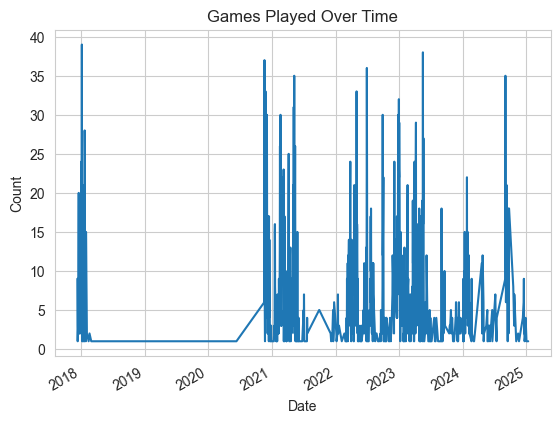

In [25]:
df['start_date'] = pd.to_datetime(df['start_date'])  # Ensure it's in datetime format
df['start_date'].value_counts().sort_index().plot(kind='line')
plt.title('Games Played Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

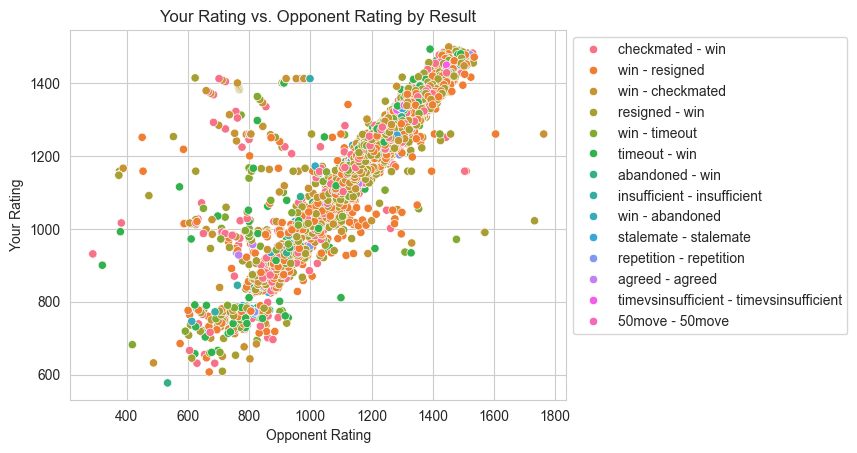

In [26]:
sns.scatterplot(data=df, x='opponent_rating', y='brengall99_rating', hue='result')
plt.title('Your Rating vs. Opponent Rating by Result')
plt.xlabel('Opponent Rating')
plt.ylabel('Your Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [27]:
df.columns

Index(['url', 'time_control', 'rated', 'brengall99_rating', 'opponent_rating',
       'white_username', 'white_rating', 'black_username', 'black_rating',
       'result', 'result_games', 'start_date', 'end_date', 'start_time',
       'end_time', 'fen', 'eco', 'eco_url', 'event', 'termination',
       'last_word'],
      dtype='object')

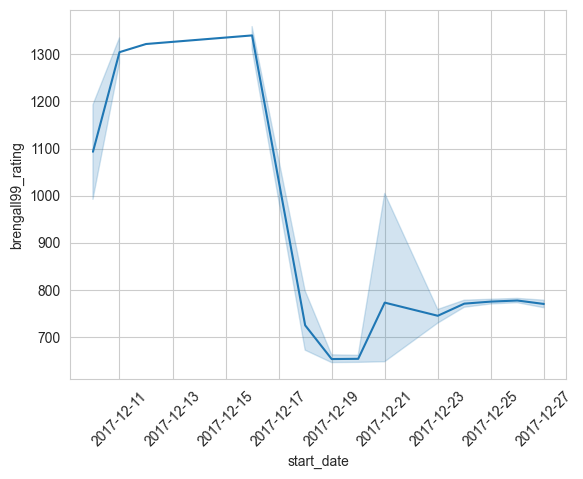

In [28]:
df_filtered_2017 = df[df['start_date'].dt.year == 2017]
sns.lineplot(x='start_date', y='brengall99_rating', data=df_filtered_2017)
plt.xticks(rotation=45)
plt.show()

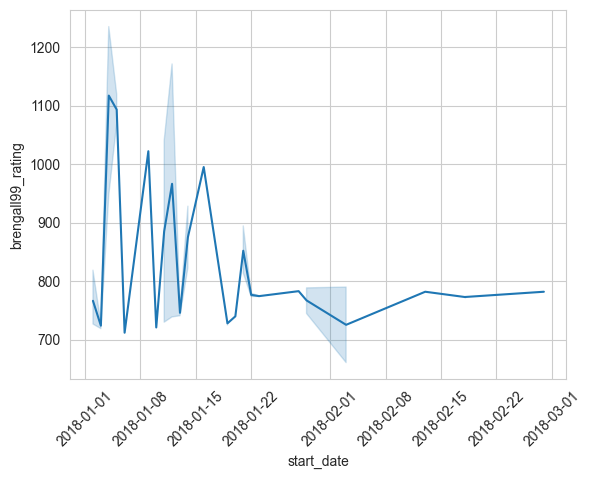

In [29]:
df_filtered_2018 = df[df['start_date'].dt.year == 2018]
sns.lineplot(x='start_date', y='brengall99_rating', data=df_filtered_2018)
plt.xticks(rotation=45)
plt.show()

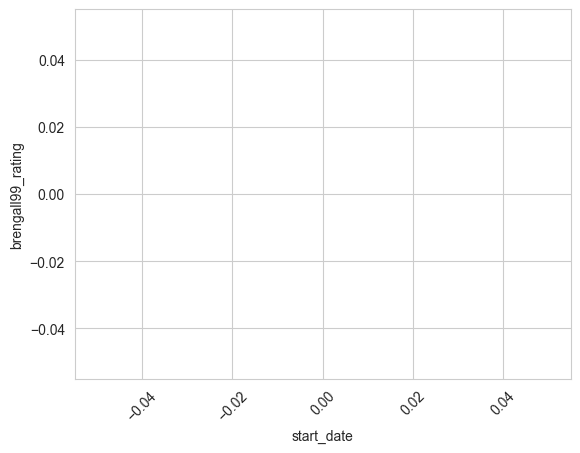

In [30]:
df_filtered_2019 = df[df['start_date'].dt.year == 2019]
sns.lineplot(x='start_date', y='brengall99_rating', data=df_filtered_2019)
plt.xticks(rotation=45)
plt.show()

# no results for this year!

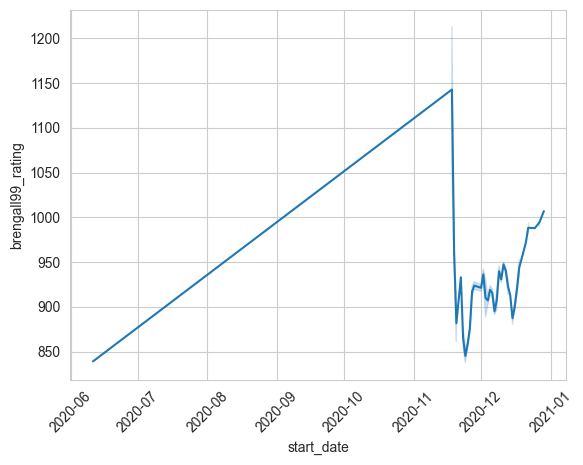

In [31]:
df_filtered_2020 = df[df['start_date'].dt.year == 2020]
sns.lineplot(x='start_date', y='brengall99_rating', data=df_filtered_2020)
plt.xticks(rotation=45)
plt.show()

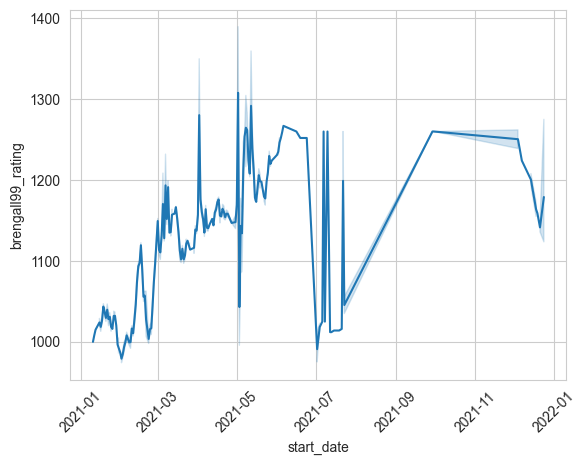

In [32]:
df_filtered_2021 = df[df['start_date'].dt.year == 2021]
sns.lineplot(x='start_date', y='brengall99_rating', data=df_filtered_2021)
plt.xticks(rotation=45)
plt.show()

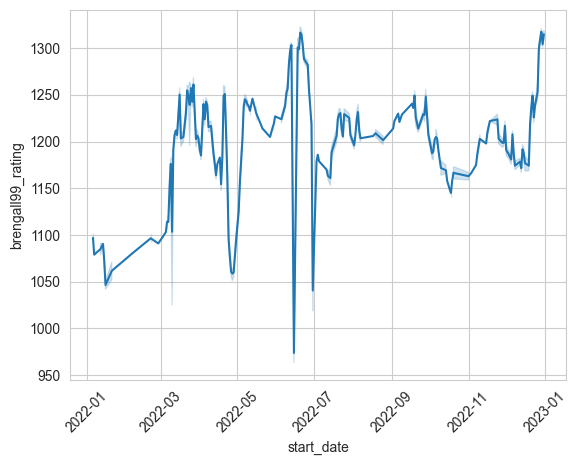

In [33]:
df_filtered_2022 = df[df['start_date'].dt.year == 2022]
sns.lineplot(x='start_date', y='brengall99_rating', data=df_filtered_2022)
plt.xticks(rotation=45)
plt.show()

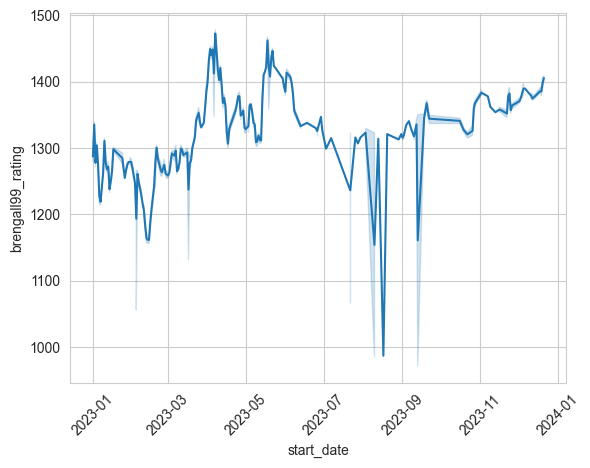

In [34]:
df_filtered_2023 = df[df['start_date'].dt.year == 2023]
sns.lineplot(x='start_date', y='brengall99_rating', data=df_filtered_2023)
plt.xticks(rotation=45)
plt.show()

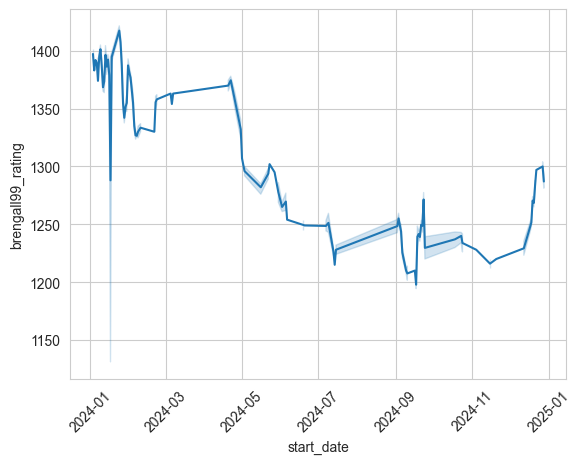

In [35]:
df_filtered_2024 = df[df['start_date'].dt.year == 2024]
sns.lineplot(x='start_date', y='brengall99_rating', data=df_filtered_2024)
plt.xticks(rotation=45)
plt.show()

In [36]:
result_games_counts = df['result_games'].value_counts()

In [37]:
print(result_games_counts)

result_games
1-0        2400
0-1        2350
1/2-1/2     214
Name: count, dtype: int64


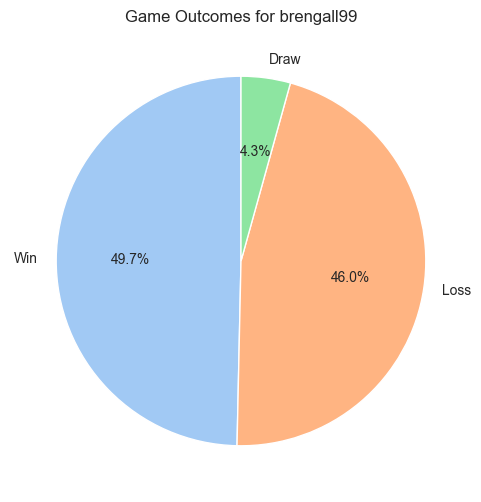

In [38]:
# Define conditions
conditions = [
    (df['white_username'] == 'brengall99') & (df['result_games'] == '0-1'),  # Loss as White
    (df['white_username'] != 'brengall99') & (df['result_games'] == '0-1'),  # Win as Black
    (df['result_games'] == '1-0') & (df['white_username'] == 'brengall99'),  # Win as White
    (df['result_games'] == '1-0') & (df['white_username'] != 'brengall99'),  # Loss as Black
    (df['result_games'] == '1/2-1/2')  # Draw
]

# Define corresponding outcomes
outcomes = ['Loss', 'Win', 'Win', 'Loss', 'Draw']

# Create a new column based on conditions
df['game_outcome'] = np.select(conditions, outcomes, default='Unknown')

# Value counts for the new column
game_outcome_counts = df['game_outcome'].value_counts()

# Plotting the pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(game_outcome_counts, labels=game_outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Game Outcomes for brengall99')
plt.show()



In [39]:
df.head()

,url,time_control,rated,brengall99_rating,opponent_rating,white_username,white_rating,black_username,black_rating,result,...,end_date,start_time,end_time,fen,eco,eco_url,event,termination,last_word,game_outcome
0,https://www.chess.com/game/live/2481103912,600,True,1051,1249,brengall99,1051,Pelleaon,1249,checkmated - win,...,2017.12.10,21:25:42,21:30:46,3r1rk1/1pp1pp1p/p5p1/6P1/8/1P3Pb1/P5P1/5q1K w - -,B00,https://www.chess.com/openings/Nimzowitsch-Def...,Live Chess,Pelleaon won by checkmate,checkmate,Loss
1,https://www.chess.com/game/daily/181561296,1/86400,True,1000,800,brengall99,1000,XxXG3rRyAdaMZXXx,800,win - resigned,...,2017.12.10,21:35:21,21:37:02,rnbqkbnr/ppp1pppp/3p4/8/4P3/8/PPPP1PPP/RNBQKBN...,B07,https://www.chess.com/openings/Pirc-Defense,Let's Play!,brengall99 won by resignation,resignation,Win
2,https://www.chess.com/game/live/2481126262,600,True,932,1188,Mvbuilder118,1188,brengall99,932,win - checkmated,...,2017.12.10,21:38:53,21:42:57,8/p1p5/3p4/kQ4B1/6b1/1Q1P1BP1/PPP2K1P/RN4NR b - -,C20,https://www.chess.com/openings/Kings-Pawn-Open...,Live Chess,Mvbuilder118 won by checkmate,checkmate,Loss
3,https://www.chess.com/game/live/2481138605,600,True,828,958,Faustino0829,958,brengall99,828,win - resigned,...,2017.12.10,21:46:08,21:53:12,6r1/5p2/3p1k2/8/8/3P1Q2/P4P1P/1R2R2K b - -,A00,https://www.chess.com/openings/Mieses-Opening-...,Live Chess,Faustino0829 won by resignation,resignation,Loss
4,https://www.chess.com/game/daily/181561476,1/86400,True,1071,645,XxXG3rRyAdaMZXXx,645,brengall99,1071,checkmated - win,...,2017.12.10,21:38:29,22:42:42,2k3nr/ppp2ppp/2n5/8/P1Pp1P2/b3r2b/1q6/1K6 w - ...,A40,https://www.chess.com/openings/Englund-Gambit,Let's Play!,brengall99 won by checkmate,checkmate,Win


In [40]:
df_eco = pd.read_csv("../data/eco_ref.csv")

In [41]:
df_eco.head()

,ECO Code,Name,Opening Moves
0,A00,Uncommon Opening,"1 g4, a3, h3, etc."
1,A01,Nimzovich-Larsen Attack,1 b3
2,A02,Bird's Opening,1 f4
3,A03,Bird's Opening,1 f4 d5
4,A04,Reti Opening,1 Nf3


In [42]:
df_eco.dtypes

ECO Code         object
Name             object
Opening Moves    object
dtype: object

In [43]:
df.dtypes

url                          object
time_control                 object
rated                          bool
brengall99_rating             int64
opponent_rating               int64
white_username               object
white_rating                  int64
black_username               object
black_rating                  int64
result                       object
result_games                 object
start_date           datetime64[ns]
end_date                     object
start_time                   object
end_time                     object
fen                          object
eco                          object
eco_url                      object
event                        object
termination                  object
last_word                    object
game_outcome                 object
dtype: object

In [44]:
df_eco.rename(columns={
    'ECO Code': 'eco',
    'Name': 'opening_name',
    'Opening Moves': 'opening_moves'}, inplace=True)

In [45]:
merged_df = pd.merge(df, df_eco, on='eco', how='left')

In [46]:
merged_df

,url,time_control,rated,brengall99_rating,opponent_rating,white_username,white_rating,black_username,black_rating,result,...,end_time,fen,eco,eco_url,event,termination,last_word,game_outcome,opening_name,opening_moves
0,https://www.chess.com/game/live/2481103912,600,True,1051,1249,brengall99,1051,Pelleaon,1249,checkmated - win,...,21:30:46,3r1rk1/1pp1pp1p/p5p1/6P1/8/1P3Pb1/P5P1/5q1K w - -,B00,https://www.chess.com/openings/Nimzowitsch-Def...,Live Chess,Pelleaon won by checkmate,checkmate,Loss,Uncommon King's Pawn Opening,1 e4
1,https://www.chess.com/game/daily/181561296,1/86400,True,1000,800,brengall99,1000,XxXG3rRyAdaMZXXx,800,win - resigned,...,21:37:02,rnbqkbnr/ppp1pppp/3p4/8/4P3/8/PPPP1PPP/RNBQKBN...,B07,https://www.chess.com/openings/Pirc-Defense,Let's Play!,brengall99 won by resignation,resignation,Win,Pirc,1 e4 d6 2 d4 Nf6
2,https://www.chess.com/game/live/2481126262,600,True,932,1188,Mvbuilder118,1188,brengall99,932,win - checkmated,...,21:42:57,8/p1p5/3p4/kQ4B1/6b1/1Q1P1BP1/PPP2K1P/RN4NR b - -,C20,https://www.chess.com/openings/Kings-Pawn-Open...,Live Chess,Mvbuilder118 won by checkmate,checkmate,Loss,King's Pawn Game,1 e4 e5
3,https://www.chess.com/game/live/2481138605,600,True,828,958,Faustino0829,958,brengall99,828,win - resigned,...,21:53:12,6r1/5p2/3p1k2/8/8/3P1Q2/P4P1P/1R2R2K b - -,A00,https://www.chess.com/openings/Mieses-Opening-...,Live Chess,Faustino0829 won by resignation,resignation,Loss,Uncommon Opening,"1 g4, a3, h3, etc."
4,https://www.chess.com/game/daily/181561476,1/86400,True,1071,645,XxXG3rRyAdaMZXXx,645,brengall99,1071,checkmated - win,...,22:42:42,2k3nr/ppp2ppp/2n5/8/P1Pp1P2/b3r2b/1q6/1K6 w - ...,A40,https://www.chess.com/openings/Englund-Gambit,Let's Play!,brengall99 won by checkmate,checkmate,Win,Queen's Pawn Game,1 d4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,https://www.chess.com/game/live/129153861781,180,True,1286,1265,KatsuoJae,1265,brengall99,1286,win - checkmated,...,19:48:38,4rrk1/p4pQp/1p1p1Pp1/2p5/2P1q3/8/PP3PPP/4R1K1 ...,C45,https://www.chess.com/openings/Scotch-Game-3.....,Live Chess,KatsuoJae won by checkmate,checkmate,Loss,Scotch Game,1 e4 e5 2 Nf3 Nc6 3 d4 exd4 4 Nxd4
4960,https://www.chess.com/game/live/129158615189,180,True,1279,1317,louhanz,1317,brengall99,1279,win - checkmated,...,21:04:16,3r4/1R6/pkp2bp1/2N2p2/1P2p3/2P1P3/1n3PP1/R3K3 ...,A80,https://www.chess.com/openings/Dutch-Defense,Live Chess,louhanz won by checkmate,checkmate,Loss,Dutch,1 d4 f5
4961,https://www.chess.com/game/live/129591247885,180,True,1272,1323,brengall99,1272,mmassaji,1323,resigned - win,...,21:18:45,1R6/5pk1/5npp/4p3/5r2/4N3/7K/8 w - -,C41,https://www.chess.com/openings/Philidor-Defens...,Live Chess,mmassaji won by resignation,resignation,Loss,Philidor Defense,1 e4 e5 2 Nf3 d6
4962,https://www.chess.com/game/live/130266659553,180,True,1279,1235,DaviReis504,1235,brengall99,1279,checkmated - win,...,16:51:31,r6k/p1R3p1/1p6/3Np3/P3P3/5n2/1PP5/2K3r1 w - - ...,C30,https://www.chess.com/openings/Kings-Gambit-2....,Live Chess,brengall99 won by checkmate,checkmate,Win,King's Gambit Declined,1 e4 e5 2 f4


In [47]:
df = merged_df

In [48]:
df['opening_name'].value_counts()

opening_name
Giuoco Piano                               514
Sicilian                                   392
Dutch                                      343
King's Pawn Game                           293
Philidor Defense                           250
                                          ... 
Sicilian, Najdorf                            1
Queen's Gambit Declined Semi-Slav            1
English, Bremen System, Keres Variation      1
Richter-Veresov Attack                       1
Dutch, Leningrad, Main Variation             1
Name: count, Length: 72, dtype: int64

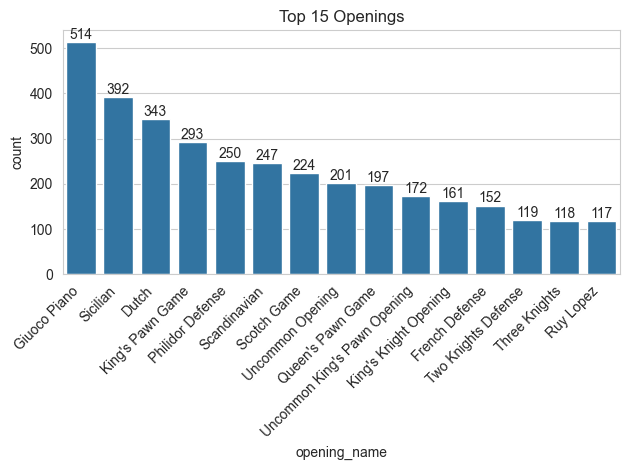

In [49]:
opening_counts = df['opening_name'].value_counts().reset_index()
opening_counts.columns = ['opening_name', 'count']  # Renaming columns for clarity

sns.set_style('whitegrid')


# Get the top 15 most common opening names
opening_counts = df['opening_name'].value_counts().reset_index()
opening_counts.columns = ['opening_name', 'count']
top_15_openings = opening_counts.head(15)  # Limiting to the top 15

# Plotting the bar plot
sns.barplot(data=top_15_openings, x='opening_name', y='count')

# Add numbers to the top of the bars
for index, row in top_15_openings.iterrows():
    plt.text(index, row['count'] + 0.1,  # Positioning slightly above the bar
             str(row['count']),  # Text to display
             ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Top 15 Openings')  # Adding a title.bar_label(ax.containers[0], fontsize=10);
plt.tight_layout()  # Adjust layout to avoid label clipping

# Show plot
plt.show()

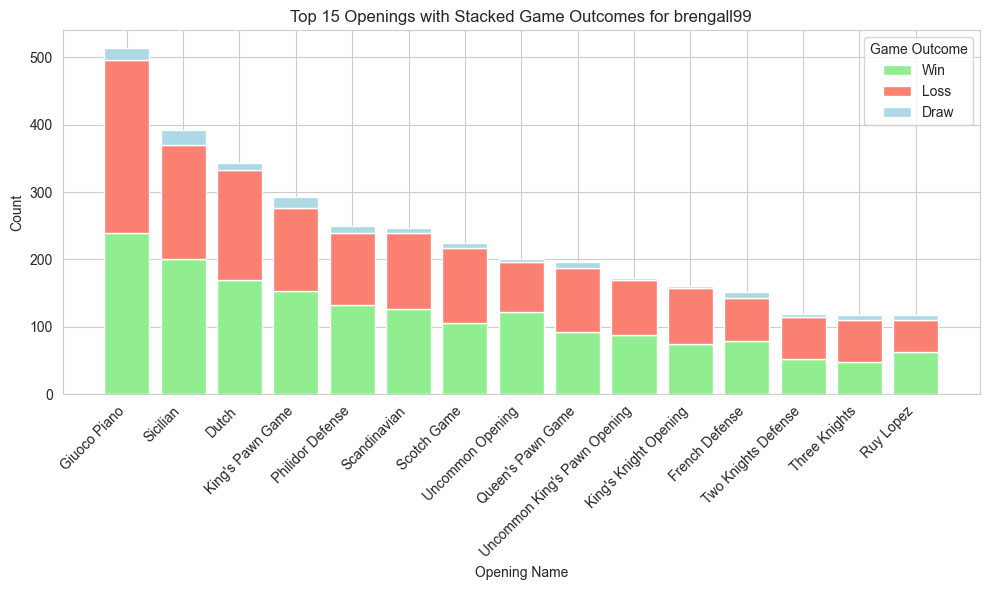

In [50]:
# Get the value counts for openings and game outcomes
opening_game_outcomes = df.groupby(['opening_name', 'game_outcome']).size().reset_index(name='count')

# Pivot the data to get counts for each game outcome (Win, Loss, Draw) as separate columns
pivoted_data = opening_game_outcomes.pivot(index='opening_name', columns='game_outcome', values='count').fillna(0)

# Sort by the total count (sum of Win, Loss, Draw for each opening)
pivoted_data['total'] = pivoted_data.sum(axis=1)
pivoted_data = pivoted_data.sort_values(by='total', ascending=False).head(15)

# Set Seaborn style
sns.set_style("whitegrid")

# Create the stacked bar plot
plt.figure(figsize=(10, 6))

# Plot each outcome (Win, Loss, Draw) as a separate bar
plt.bar(pivoted_data.index, pivoted_data['Win'], label='Win', color='lightgreen')
plt.bar(pivoted_data.index, pivoted_data['Loss'], bottom=pivoted_data['Win'], label='Loss', color='salmon')
plt.bar(pivoted_data.index, pivoted_data['Draw'], bottom=pivoted_data['Win'] + pivoted_data['Loss'], label='Draw', color='lightblue')

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Top 15 Openings with Stacked Game Outcomes for brengall99')
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout to avoid label clipping

# Add legend
plt.legend(title='Game Outcome')

# Show the plot
plt.show()

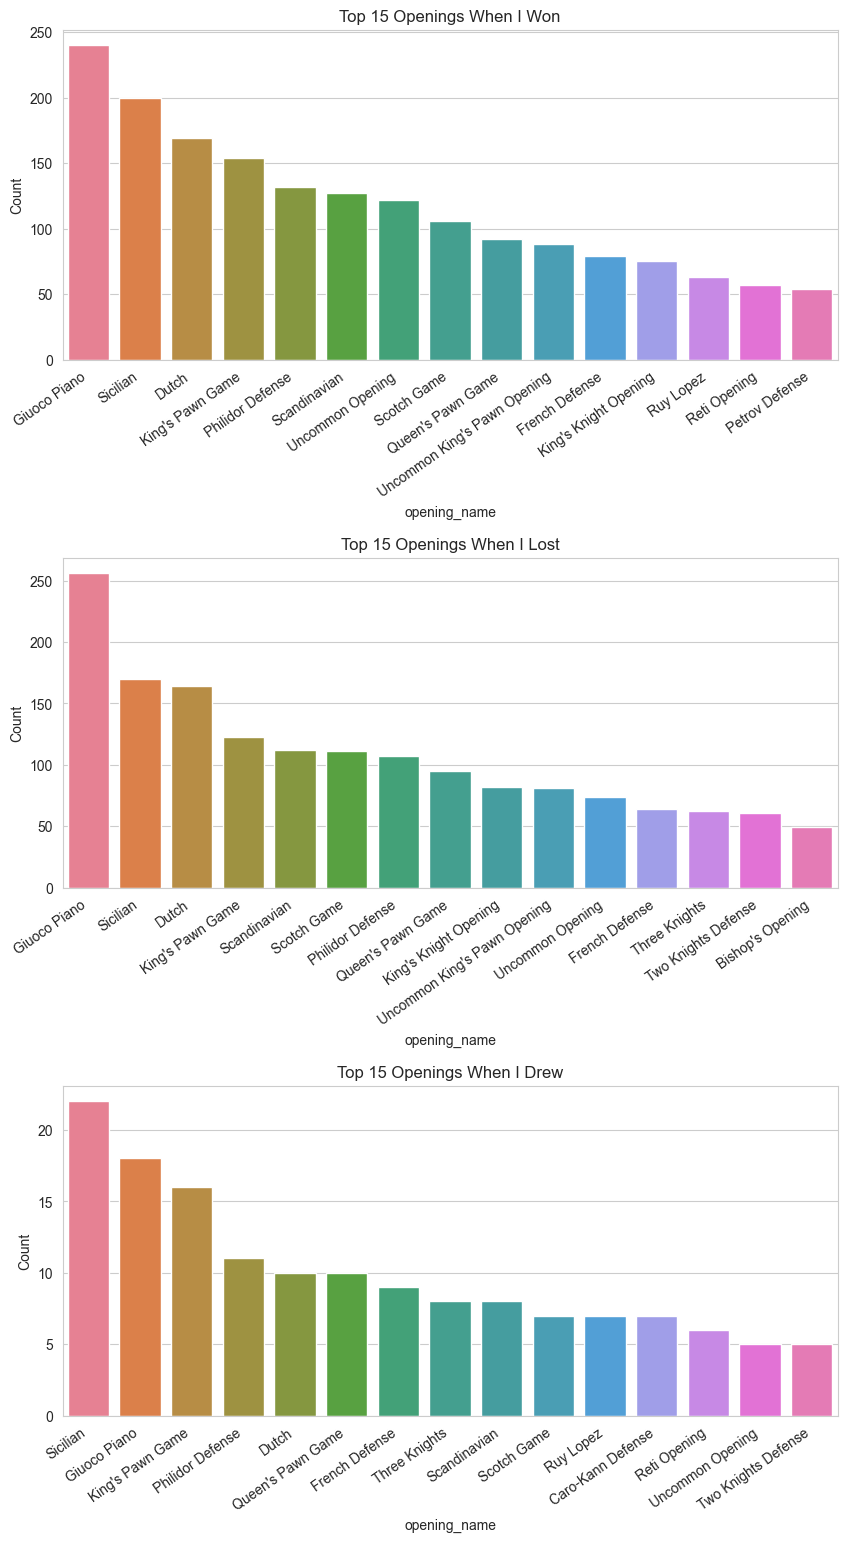

In [51]:
# Get the value counts for openings and game outcomes
opening_game_outcomes = df.groupby(['opening_name', 'game_outcome']).size().reset_index(name='count')

# Filter the data for each outcome (Win, Loss, Draw)
win_data = opening_game_outcomes[opening_game_outcomes['game_outcome'] == 'Win']
loss_data = opening_game_outcomes[opening_game_outcomes['game_outcome'] == 'Loss']
draw_data = opening_game_outcomes[opening_game_outcomes['game_outcome'] == 'Draw']

# Get the top 15 most common openings for each outcome
top_15_wins = win_data.groupby('opening_name').sum().sort_values(by='count', ascending=False).head(15)
top_15_losses = loss_data.groupby('opening_name').sum().sort_values(by='count', ascending=False).head(15)
top_15_draws = draw_data.groupby('opening_name').sum().sort_values(by='count', ascending=False).head(15)

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Wins
sns.barplot(data=top_15_wins.reset_index(), x='opening_name', y='count', ax=axes[0], hue='opening_name', legend=False)
axes[0].set_title('Top 15 Openings When I Won')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(len(top_15_wins)))  # Set tick positions
axes[0].set_xticklabels(top_15_wins.index, rotation=35, ha='right')  # Set tick labels with rotation

# Plot for Losses
sns.barplot(data=top_15_losses.reset_index(), x='opening_name', y='count', ax=axes[1], hue='opening_name', legend=False)
axes[1].set_title('Top 15 Openings When I Lost')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(len(top_15_losses)))  # Set tick positions
axes[1].set_xticklabels(top_15_losses.index, rotation=35, ha='right')  # Set tick labels with rotation

# Plot for Draws
sns.barplot(data=top_15_draws.reset_index(), x='opening_name', y='count', ax=axes[2], hue='opening_name', legend=False)
axes[2].set_title('Top 15 Openings When I Drew')
axes[2].set_ylabel('Count')
axes[2].set_xticks(range(len(top_15_draws)))  # Set tick positions
axes[2].set_xticklabels(top_15_draws.index, rotation=35, ha='right')  # Set tick labels with rotation

# Adjust layout to add whitespace between plots
plt.subplots_adjust(hspace=0.6)  # Increase or decrease the value for more/less space between subplots

# Show the plots
plt.show()

game_outcome,Draw,Loss,Win
rating_bracket,,,
300-399,0.0,14.3,85.7
400-499,0.0,40.0,60.0
500-599,0.0,14.3,85.7
600-699,1.5,27.9,70.6
700-799,3.8,26.7,69.5
800-899,5.2,33.3,61.4
900-999,5.0,45.2,49.8
1000-1099,3.5,44.0,52.5
1100-1199,4.5,40.5,55.0


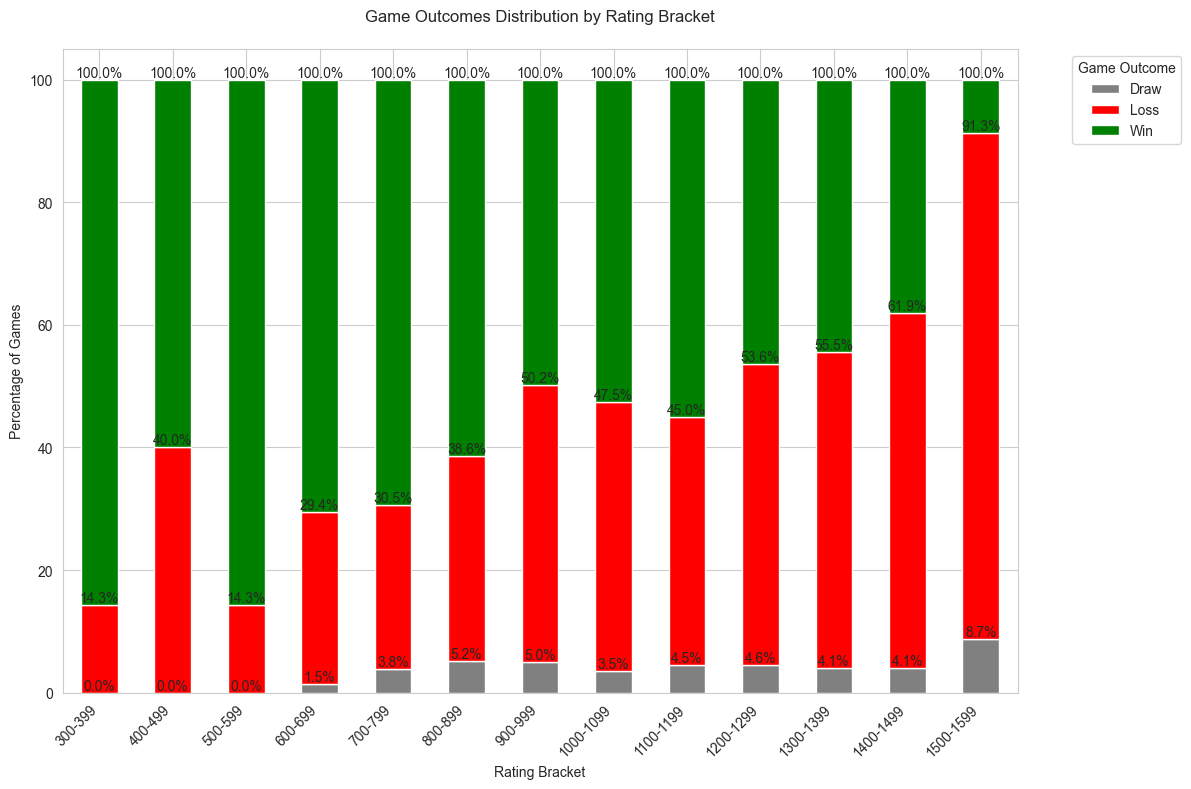

In [52]:
# Assuming your DataFrame df is already loaded
sns.set_style("whitegrid")

# Define bins correctly from 0 to 2000 with intervals of 100 (21 edges, 20 intervals)
bins = range(300, 1601, 100)

# Define labels for the 20 intervals
labels = [f'{i}-{i+99}' for i in range(300, 1600, 100)]

# Create rating brackets by cutting the 'opponent_rating' based on the defined bins and labels
df['rating_bracket'] = pd.cut(df['opponent_rating'], bins=bins, labels=labels, right=False)

# Count outcomes for each bracket (normalize to percentage)
outcome_counts = pd.crosstab(df['rating_bracket'], df['game_outcome'], normalize='index') * 100

# Define custom colors for the outcomes (assuming the game outcomes are 'win', 'draw', 'loss')
color_mapping = {
    'Win': 'green',   # Green for 'win'
    'Loss': 'red',    # Red for 'loss'
    'Draw': 'gray'    # Gray for 'draw'
}

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Get the order of the columns (this could be 'win', 'draw', 'loss', etc.)
column_order = outcome_counts.columns

# Create stacked bar chart
outcome_counts.plot(kind='bar', 
                    stacked=True, 
                    ax=ax, 
                    color=[color_mapping.get(col, 'lightblue') for col in column_order])

# Customize the chart
ax.set_title('Game Outcomes Distribution by Rating Bracket', pad=20)
ax.set_xlabel('Rating Bracket')
ax.set_ylabel('Percentage of Games')
ax.legend(title='Game Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the outcome counts with rounded percentages
display(outcome_counts.round(1))

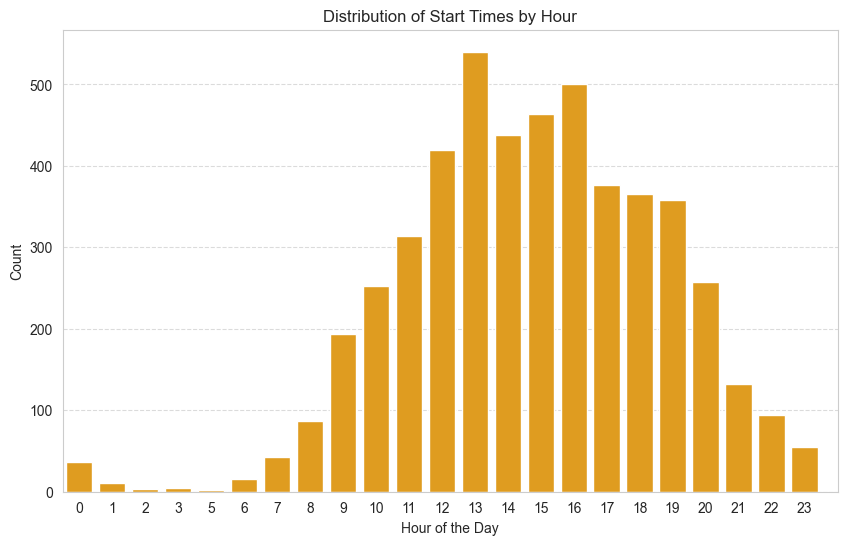

In [53]:
# Convert start_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S')

# Extract the hour
df['hour'] = df['start_time'].dt.hour

# Count occurrences of each hour
hour_counts = df['hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, color='orange')
plt.title('Distribution of Start Times by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(24))  # Ensure all 24 hours are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

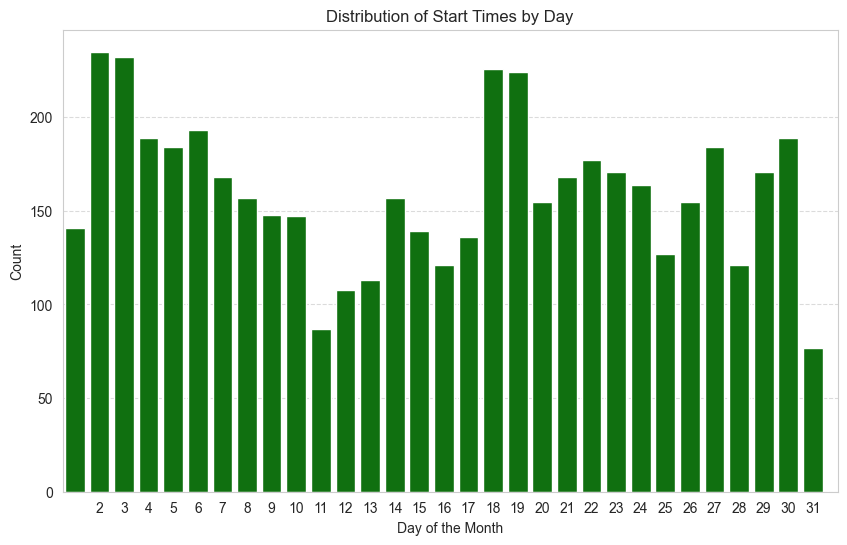

In [54]:
df['day'] = df['start_date'].dt.day

# Count occurrences of each day
day_counts = df['day'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, color='green')
plt.title('Distribution of Start Times by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.xticks(range(1, 32))  # Ensure all days (1–31) are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

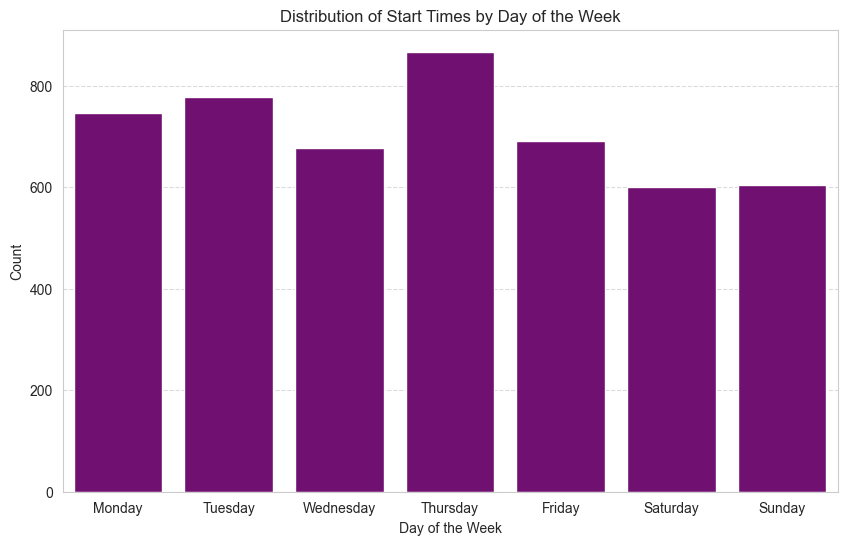

In [55]:
# Extract the day of the week
df['day_of_week'] = df['start_date'].dt.day_name()

# Count occurrences of each day
day_of_week_counts = df['day_of_week'].value_counts()

# To ensure days are in order (Monday, Tuesday, ...)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(day_order)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, color='purple')
plt.title('Distribution of Start Times by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [57]:
df['end_time'] = pd.to_datetime(df['end_time'], format='%H:%M:%S')

# Calculate the time spent playing
df['time_spent'] = df['end_time'] - df['start_time']

df['time_spent_minutes'] = df['time_spent'].dt.total_seconds() / 60 # Convert to minutes
df['time_spent_minutes'] = df['time_spent_minutes'].round(2)

print(f'{sum(df['time_spent_minutes'])/ 60} hours played')

# Number of days with gameplay
days_with_gameplay = df['start_date'].nunique()
print(f"Number of days with gameplay: {days_with_gameplay}")

# Longest playing streak
sorted_dates = df['start_date'].drop_duplicates().sort_values()
date_diffs = sorted_dates.diff().dt.days
longest_playing_streak = (date_diffs != 1).cumsum().value_counts().max()
print(f"Longest playing streak: {longest_playing_streak} days")

# Longest break streak
longest_break_streak = date_diffs.max() - 1  # Subtract 1 to exclude the surrounding days
print(f"Longest break streak: {longest_break_streak} days")

215.2485 hours played
Number of days with gameplay: 710
Longest playing streak: 33 days
Longest break streak: 833.0 days


In [58]:
df

,url,time_control,rated,brengall99_rating,opponent_rating,white_username,white_rating,black_username,black_rating,result,...,last_word,game_outcome,opening_name,opening_moves,rating_bracket,hour,day,day_of_week,time_spent,time_spent_minutes
0,https://www.chess.com/game/live/2481103912,600,True,1051,1249,brengall99,1051,Pelleaon,1249,checkmated - win,...,checkmate,Loss,Uncommon King's Pawn Opening,1 e4,1200-1299,21,10,Sunday,0 days 00:05:04,5.07
1,https://www.chess.com/game/daily/181561296,1/86400,True,1000,800,brengall99,1000,XxXG3rRyAdaMZXXx,800,win - resigned,...,resignation,Win,Pirc,1 e4 d6 2 d4 Nf6,800-899,21,10,Sunday,0 days 00:01:41,1.68
2,https://www.chess.com/game/live/2481126262,600,True,932,1188,Mvbuilder118,1188,brengall99,932,win - checkmated,...,checkmate,Loss,King's Pawn Game,1 e4 e5,1100-1199,21,10,Sunday,0 days 00:04:04,4.07
3,https://www.chess.com/game/live/2481138605,600,True,828,958,Faustino0829,958,brengall99,828,win - resigned,...,resignation,Loss,Uncommon Opening,"1 g4, a3, h3, etc.",900-999,21,10,Sunday,0 days 00:07:04,7.07
4,https://www.chess.com/game/daily/181561476,1/86400,True,1071,645,XxXG3rRyAdaMZXXx,645,brengall99,1071,checkmated - win,...,checkmate,Win,Queen's Pawn Game,1 d4,600-699,21,10,Sunday,0 days 01:04:13,64.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,https://www.chess.com/game/live/129153861781,180,True,1286,1265,KatsuoJae,1265,brengall99,1286,win - checkmated,...,checkmate,Loss,Scotch Game,1 e4 e5 2 Nf3 Nc6 3 d4 exd4 4 Nxd4,1200-1299,19,28,Saturday,0 days 00:02:56,2.93
4960,https://www.chess.com/game/live/129158615189,180,True,1279,1317,louhanz,1317,brengall99,1279,win - checkmated,...,checkmate,Loss,Dutch,1 d4 f5,1300-1399,21,28,Saturday,0 days 00:01:51,1.85
4961,https://www.chess.com/game/live/129591247885,180,True,1272,1323,brengall99,1272,mmassaji,1323,resigned - win,...,resignation,Loss,Philidor Defense,1 e4 e5 2 Nf3 d6,1300-1399,21,2,Thursday,0 days 00:04:40,4.67
4962,https://www.chess.com/game/live/130266659553,180,True,1279,1235,DaviReis504,1235,brengall99,1279,checkmated - win,...,checkmate,Win,King's Gambit Declined,1 e4 e5 2 f4,1200-1299,16,10,Friday,0 days 00:03:04,3.07


In [ ]:
df.to_csv('../data/processed/c.csv', index=False)